In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(X_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [4]:
print(X_test.shape,y_test.shape)

(10000, 28, 28) (10000,)


In [5]:
def show_train_img(index):
    plt.imshow(X_train[index])
    print(y_train[index])

8


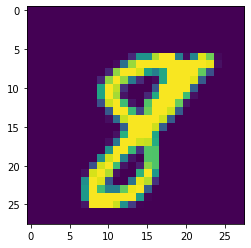

In [6]:
show_train_img(55)

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
cnn = keras.models.Sequential([
    keras.layers.Conv2D(filters=24, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(filters=36, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Flatten(),
    keras.layers.Dense(125, activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 49s 25ms/step - loss: 0.1631 - accuracy: 0.9496
Epoch 2/10
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0519 - accuracy: 0.9837
Epoch 3/10
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0354 - accuracy: 0.9891
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.0271 - accuracy: 0.9917
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0189 - accuracy: 0.9941
Epoch 6/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0164 - accuracy: 0.9951
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0139 - accuracy: 0.9955
Epoch 8/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0118 - accuracy: 0.9962
Epoch 9/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [11]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.0531 - accuracy: 0.9892


[0.05308958888053894, 0.9891999959945679]

313/313 [==============================] - 3s 8ms/step


Text(69.0, 0.5, 'Truth')

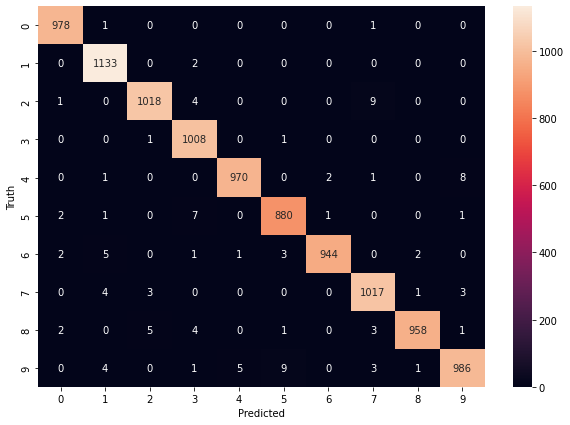

In [13]:
y_predicted = cnn.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
def check_prediction(index):
    print("Predicted: ",np.argmax(y_predicted[index]))
    print("Actual:",y_test[index])
    return plt.imshow(X_test[index])

Predicted:  0
Actual: 0


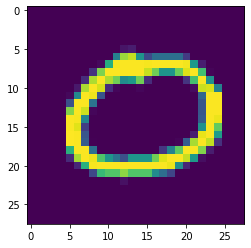

In [18]:
check_prediction(69)